In [1]:
import pandas as pd

In [2]:
!pip show pandas


Name: pandas
Version: 2.3.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

 Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
 All rights reserved.

 Copyright (c) 2011-2023, Open source contributors.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contribut

In [3]:
import pandas as pd
print("✅ pandas fonctionne !")


✅ pandas fonctionne !


In [5]:
df = pd.read_csv(r"C:\Users\arbi\Desktop\projet3\autoscout.csv")


In [6]:
print("✅ Fichier chargé")
df.head()


✅ Fichier chargé


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [7]:
df = df[['price', 'km', 'hp_kW', 'Fuel', 'Gearing_Type', 'make_model', 'Displacement_cc', 'Weight_kg']]
df.head()


,price,km,hp_kW,Fuel,Gearing_Type,make_model,Displacement_cc,Weight_kg
0,15770,56013.0,66.0,Diesel,Automatic,Audi A1,1422.0,1220.0
1,14500,80000.0,141.0,Benzine,Automatic,Audi A1,1798.0,1255.0
2,14640,83450.0,85.0,Diesel,Automatic,Audi A1,1598.0,1135.0
3,14500,73000.0,66.0,Diesel,Automatic,Audi A1,1422.0,1195.0
4,16790,16200.0,66.0,Diesel,Automatic,Audi A1,1422.0,1135.0


In [8]:
df = df.dropna()
print("✅ Données nettoyées :", df.shape)


✅ Données nettoyées : (15915, 8)


In [9]:
df_encoded = pd.get_dummies(df, columns=['Fuel', 'Gearing_Type', 'make_model'], drop_first=True)
df_encoded.head()


,price,km,hp_kW,Displacement_cc,Weight_kg,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Gearing_Type_Manual,Gearing_Type_Semi-automatic,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace
0,15770,56013.0,66.0,1422.0,1220.0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,14500,80000.0,141.0,1798.0,1255.0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,14640,83450.0,85.0,1598.0,1135.0,True,False,False,False,False,False,False,False,False,False,False,False,False
3,14500,73000.0,66.0,1422.0,1195.0,True,False,False,False,False,False,False,False,False,False,False,False,False
4,16790,16200.0,66.0,1422.0,1135.0,True,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Régression linéaire :")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))


Régression linéaire :
MSE: 9907864.546194881
R²: 0.816410807122891


In [13]:
!pip install xgboost


   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/149.9 MB 6.3 MB/s eta 0:00:24
    --------------------------------------- 2.6/149.9 MB 6.6 MB/s eta 0:00:23
    --------------------------------------- 3.4/149.9 MB 6.6 MB/s eta 0:00:23
   - -------------------------------------- 4.2/149.9 MB 5.2 MB/s eta 0:00:29
   - -------------------------------------- 6.6/149.9 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 8.1/149.9 MB 6.4 MB/s eta 0:00:23
   -- ------------------------------------- 9.4/149.9 MB 6.4 MB/s eta 0:00:22
   -- ------------------------------------- 10.5/149.9 MB 6.1 MB/s eta 0:00:23
   --- ------------------------------------ 12.1/149.9 MB 6.3 MB/s eta 0:00:22
   --- ------------------------------------ 13.6/149.9 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 14.9/149.9 MB 6.4 MB/s eta 0:00:22
   ---- ----------------------------------- 16.5/149.9 MB 6.4 MB/s 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que df_encoded est ton DataFrame final avec variables numériques
# Exemple : features = toutes les colonnes sauf 'price' (cible)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modèle 1 : Random Forest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

# --- Modèle 2 : XGBoost ---
xgb = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}")

Random Forest - MSE: 4791923.65, R²: 0.9112
XGBoost - MSE: 4449720.50, R²: 0.9175


Random Forest - MSE: 4791923.65, R²: 0.9112
XGBoost - MSE: 4449720.50, R²: 0.9175


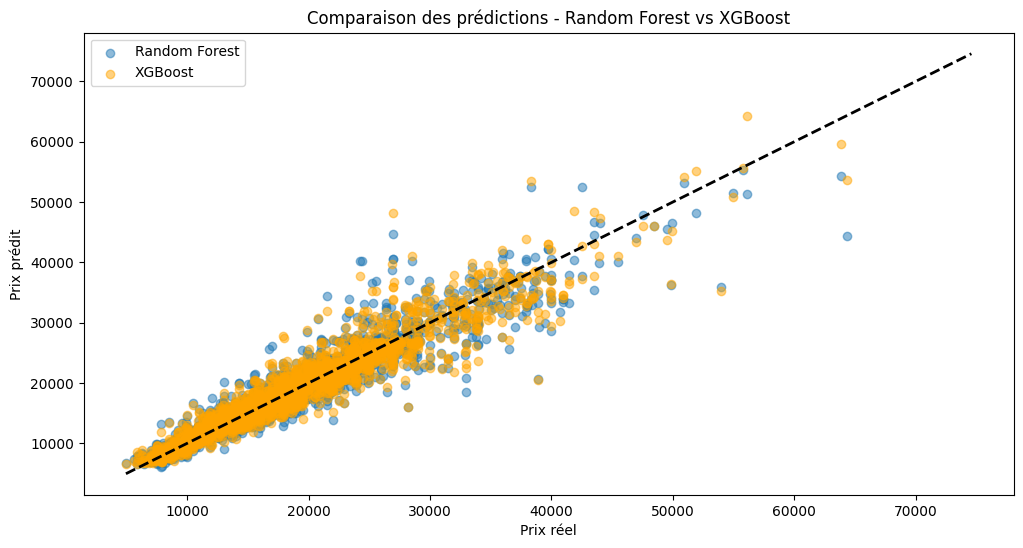

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supposons que df_encoded est ton DataFrame final avec toutes les variables numériques
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}")

# Visualisation comparaison des prédictions
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Comparaison des prédictions - Random Forest vs XGBoost')
plt.legend()
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBRegressor(random_state=42, eval_metric='rmse')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score R² (CV) :", grid_search.best_score_)

# Réentraînement du modèle avec les meilleurs paramètres
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test MSE:", mean_squared_error(y_test, y_pred_best))
print("Test R²:", r2_score(y_test, y_pred_best))


Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Meilleur score R² (CV) : 0.9145731727282206
Test MSE: 4146879.0
Test R²: 0.9231598377227783


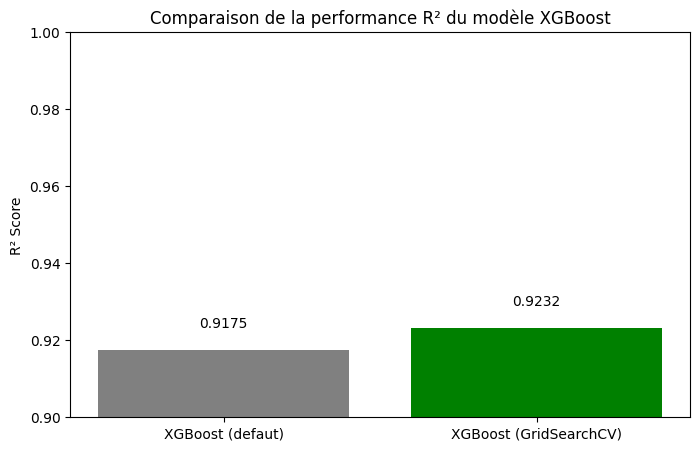

In [17]:
import matplotlib.pyplot as plt

# Scores R² avant et après GridSearchCV
r2_before = 0.9175  # XGBoost par défaut (exemple)
r2_after = 0.9232   # XGBoost optimisé

models = ['XGBoost (defaut)', 'XGBoost (GridSearchCV)']
r2_scores = [r2_before, r2_after]

plt.figure(figsize=(8,5))
bars = plt.bar(models, r2_scores, color=['gray', 'green'])
plt.ylim([0.9, 1])
plt.ylabel("R² Score")
plt.title("Comparaison de la performance R² du modèle XGBoost")

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.show()


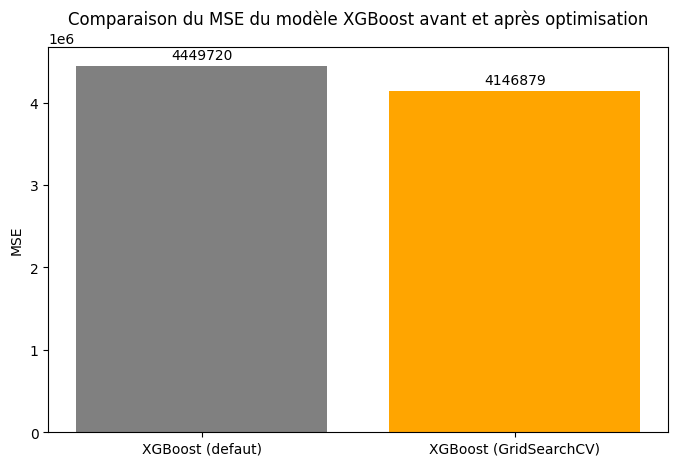

In [18]:
import matplotlib.pyplot as plt

# MSE avant et après GridSearchCV (exemples avec tes valeurs)
mse_before = 4449720.50  # XGBoost par défaut
mse_after = 4146879.0    # XGBoost optimisé

models = ['XGBoost (defaut)', 'XGBoost (GridSearchCV)']
mse_scores = [mse_before, mse_after]

plt.figure(figsize=(8,5))
bars = plt.bar(models, mse_scores, color=['gray', 'orange'])
plt.ylabel("MSE")
plt.title("Comparaison du MSE du modèle XGBoost avant et après optimisation")

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(mse_scores)*0.01, f"{yval:.0f}", ha='center', va='bottom')

plt.show()


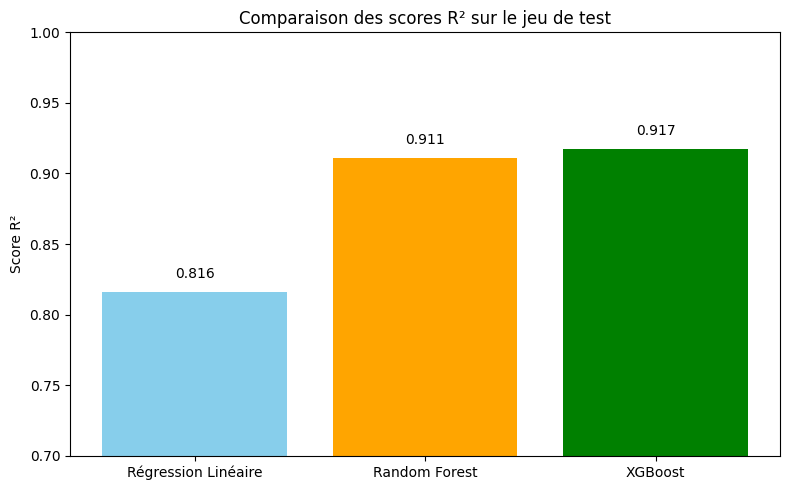

In [19]:
import matplotlib.pyplot as plt

# Données
model_names = ['Régression Linéaire', 'Random Forest', 'XGBoost']
r2_scores = [0.816, 0.911, 0.917]

# Graphique
plt.figure(figsize=(8,5))
bars = plt.bar(model_names, r2_scores, color=['skyblue', 'orange', 'green'])
plt.ylim(0.7, 1)
plt.title("Comparaison des scores R² sur le jeu de test")
plt.ylabel("Score R²")

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center')

plt.tight_layout()
plt.show()


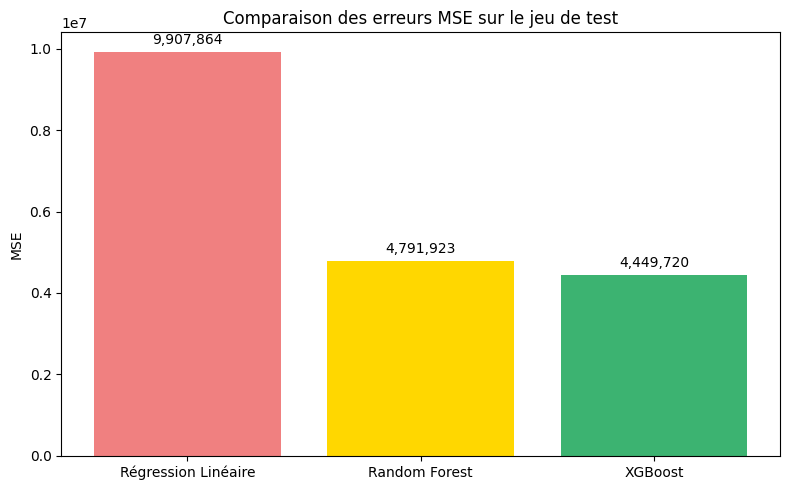

In [20]:
mse_scores = [9_907_864, 4_791_923, 4_449_720]

plt.figure(figsize=(8,5))
bars = plt.bar(model_names, mse_scores, color=['lightcoral', 'gold', 'mediumseagreen'])
plt.title("Comparaison des erreurs MSE sur le jeu de test")
plt.ylabel("MSE")

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200000, f'{yval:,.0f}', ha='center')

plt.tight_layout()
plt.show()
